# Part 1 of Project 2: Data Loading and Initial Exploration

In [81]:
#Import necessary packages and use given style
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

In [82]:
#Load SOTU.csv from data folder
sou = pd.read_csv("data/SOTU.csv")
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


# Exploratory Data Analysis

## Number of Speeches per President

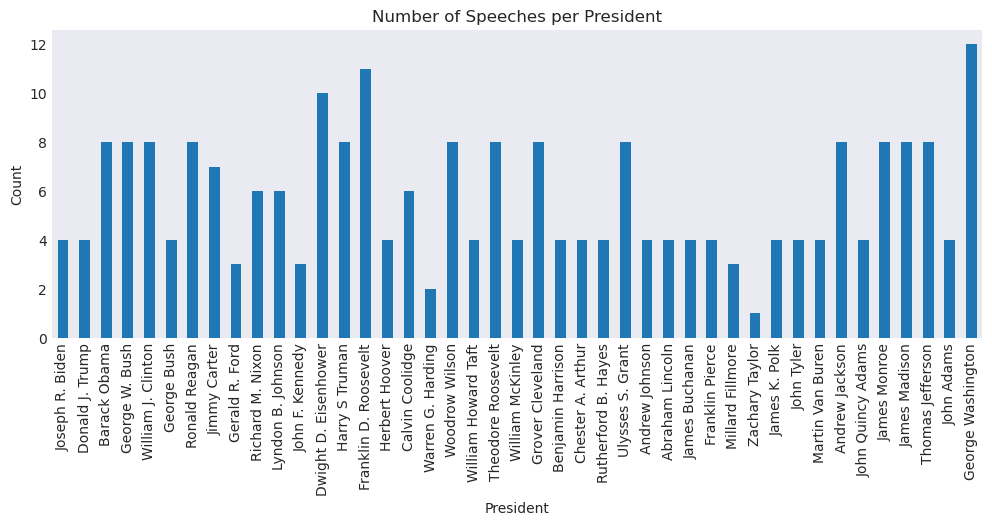

In [80]:
#Create pd.Series of number of speeches (w/o sorting to maintain order) and make bar plot
num_speeches_pres = sou['President'].value_counts(sort=False)
plt.figure(figsize=(12, 4))
plt.ylabel("Count")
plt.title("Number of Speeches per President")
num_speeches_pres.plot(kind='bar');

Results: Generally, presidents appear to give about one speech for every year they are in office (which explains why 4 and 8 are the most common values). The main exceptions to this are George Washington and some WWII era presidents who may have adjusted their count due to the circumstances.

## Number of Speeches per Year

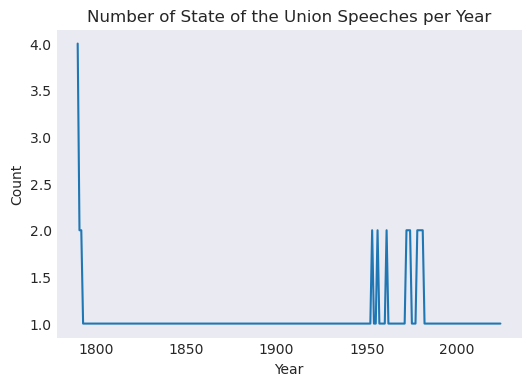

In [84]:
#Create pd.Series of speech length and plot
num_speeches_year = sou['Year'].value_counts(sort=False)
plt.figure(figsize=(6, 4))
plt.ylabel("Count")
offset_1 = 0.15 #Use offset for y-axis to make values easier to see
plt.ylim(1.0-offset_1, num_speeches_year.max()+offset_1)
plt.title("Number of State of the Union Speeches per Year")
num_speeches_year.plot();

Results: Almost every year had at least one SOTU speech, but the first few years had far more (up to 4 in a single year). George Washington may have thought that more speeches were needed to update Congress/the country at the very start. There were also 2 speeches at a few times in the mid-late 20th century. A few presidents died in office (eg. FDR, JFK), so their successors may have given speeches in the same year as they had.

## Word Count Distribution

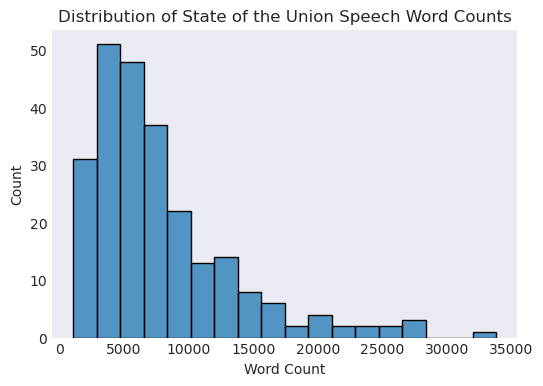

In [85]:
words = sou['Text'].str.split() #Making pd.Series of word count (in next line)
word_count = words.str.len()
plt.figure(figsize=(6, 4))
plt.xlabel("Word Count")
plt.title("Distribution of State of the Union Speech Word Counts")
sns.histplot(word_count);

Results: As expected, the distribution is mostly concentrated in the 2-10K word range with a right skew. An interesting value we see is the datapoint around 35K words. We're wondering if this was in a time of greater instability or if it was just an unusually long speech.

## Word Count Distribution over Year

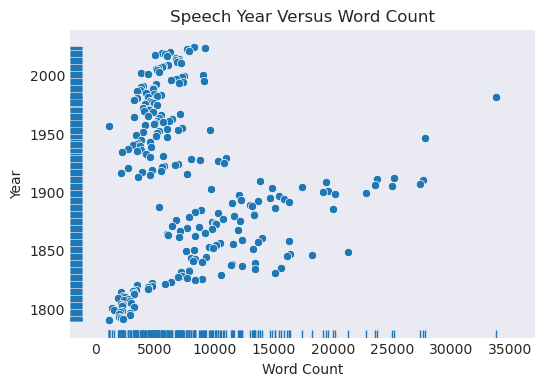

In [87]:
#Using word_count created above and adding it as a column to sou
sou['Word Count'] = sou['Text'].str.split().str.len()
plt.figure(figsize=(6, 4))
plt.title("Speech Year Versus Word Count")
offset_2 = 15 #Use offset for y-axis to make values easier to see
sns.scatterplot(data=sou, x="Word Count", y="Year")
plt.ylim(sou["Year"].min()-offset_2, sou["Year"].max()+offset_2) 
sns.rugplot(data=sou, x="Word Count", y="Year");

Results: One interesting trend is that the first few speeches (particularly the 4 given in a single year) were all fairly short (<5K words) and that speech length generally peaked around 1900. The outlier from the prior graph of 35K words occurred in around 1980.

## Word Count Distribution per President

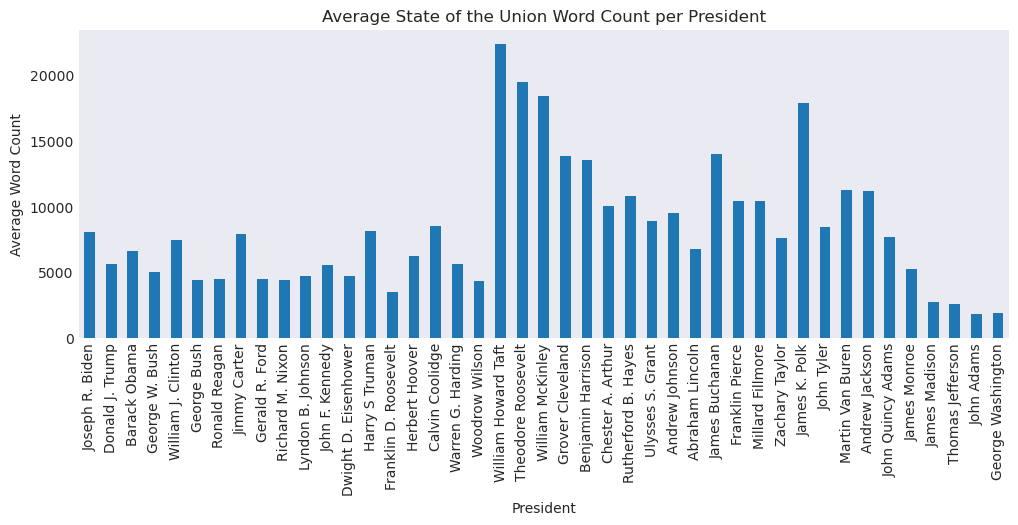

In [86]:
plt.figure(figsize=(12, 4))
plt.title("Average State of the Union Word Count per President")
plt.ylabel("Average Word Count")
word_count = sou.groupby('President', sort=False)['Word Count'].mean() #Compute average word count by separating speeches by president first
word_count.plot(kind='bar');

Results: As seen above, the average word count generally peaked with presidents around 1900. An interesting datapoint is Woodrow Wilson who gave far shorter speeches than his predecessors (and successors). He was the president when WWI started, so he may have chosen to give speeches focused on the war and very few other issues. His successors gave shorter speeches as did the first few presidents (ie. Washington, Adams, etc).